Rishwan Tariq 17L-4095
Noorish Hassan 17L-4002



Part 1 :


1.   Scatter Plot
2.   Linear Regression and Gradient Descent
3.   Linear Regression Line Plot

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd




In [ ]:
def getData():
  file = open("/content/ex1data1.txt","r")
  Population = np.array([])
  Profit = np.array([])

  for x in file:
    split=x.split(",",2)
    Population=np.append(Population,float (split[0]))
    split[1] = split[1].strip('\n')
    Profit=np.append(Profit,float (split[1]))

  file.close()

  return Population, Profit

def plotData(Population,Profit, predicted_value=None):
  plt.scatter(Population,Profit,marker='x', c = 'r')
  plt.title("Scatter Plot of Training Data")
  plt.xlabel("Population of City in 10,000s")
  plt.ylabel("Profit in $10,000s")
  if predicted_value is not None:
    plt.plot(X,predicted_value,'-',c='b')
    plt.legend(['Linear regression'])
  plt.show()

def costFunction(X,Y,Q):
  m=Y.size 
  cost = 1/(2*m) * np.sum(np.square(np.dot(X,Q) - Y))
  return cost

def gradientDescent(X,Y,Learning_rate,Q,numberOfIterations):
  m=Y.shape[0]
  Q=Q.copy()
  for i in range(numberOfIterations):
    Q = Q - (Learning_rate/m) * (np.dot(X,Q) - Y).dot(X)
    Cost = costFunction(X,Y,Q)

  return Q,Cost




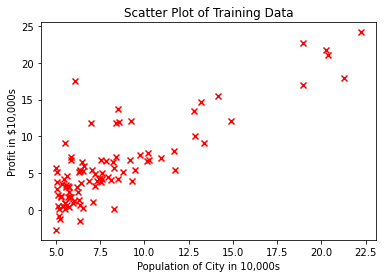

[-1.63888518  0.96630399]
4.940687755174639


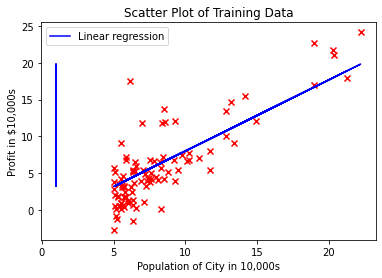

In [ ]:
X, Y = getData()
plotData(A,B)

m = Y.size

X = np.stack([np.ones(m), X], axis = 1)

Q = np.zeros(2)
Q[0] = 0
Q[1] = 1

Learning_rate = 0.001
i = 3000

Q, cost = gradientDescent(X,Y,Learning_rate, Q, i)

print(Q)
print(cost)

predicted_value = np.dot(X,Q)
plotData(X[:,1], Y, predicted_value)

Part - II
- Multivariable Linear Regression
- Feature Normalization (mean and std)
- Gradient Descent 
- Plot of cost array (decreasing until constant)
- Test prediction


Thetas:  [[340412.68085106]
 [109447.79936007]
 [ -6578.32537517]]


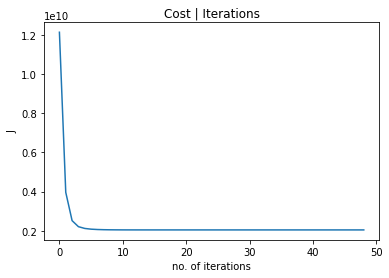

Cost for a house of area 1650 square feet with three bedrooms:
[293081.47765723]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def gradientDescent(X, y, Q, learningRate, iterations):
    m = len(y)
    cost = []
    for i in range(1, iterations):
        hypothesis = np.dot(X, Q)
        errors = hypothesis - y
        newDecrement = (learningRate * (1/m) * np.dot(np.transpose(errors), X))
        Q = Q - np.transpose(newDecrement)
        cost.append(costFunction(X, y, Q)) 

    return Q, cost

def featureNormalize(X):
  mean = np.mean(X,0)
  std = np.std(X,0)
  return ((X - mean) / std), mean, std

def plot_cost(cost):
  plt.plot(list(range(len(cost))), cost, '-')
  plt.title('Cost | Iterations')
  plt.xlabel('no. of iterations')
  plt.ylabel('J')
  plt.show()


def costFunction(X,y,Q):
  m=y.size 
  cost = 1/(2*m) * np.sum(np.square(np.dot(X,Q) - y))
  return cost

#get date (divided into X(Size, Bedrooms) and y(Price))
data = np.loadtxt('ex1data2.txt', dtype=np.int, delimiter=",")
X = data[:, 0:2]
y = data[:, 2:2+1]
m = len(y)

X, mean, std = featureNormalize(X)

# Adding 1s to the vector for vectorized gradient descent

ones = np.ones(m, dtype=np.int)
X = np.column_stack((ones, X))
learningRate = 0.6
iterations = 50
Q = np.zeros((2+1, 1), dtype=np.int)

Q, cost = gradientDescent(X, y, Q, learningRate, iterations)

print('The value of Q is : ', Q)
plot_cost(cost)

# find predicted value for 3 bedrooms and 1650 ft
Test_value = np.array([1650, 3])
Test_value_normalized = np.subtract(Test_value,mean) / std
Test_value_normalized = np.hstack([np.ones(1), Test_value_normalized])

predicted = np.dot(Test_value_normalized,Q)
print('Cost for a house of area 1650 square feet with 3 bedrooms:')
print(predicted)


Part 3 – Normal Equations
- Normal Equation
- Prediction 

In [ ]:
import numpy as np

def getData():
  #get date (divided into X(Size, Bedrooms) and y(Price))
  data = np.loadtxt('ex1data2.txt', dtype=np.int, delimiter=",")
  X = data[:, 0:2]
  y = data[:, 2:2+1]    

  return X, y



X,y = getData()
m=len(y)
X = np.hstack([np.ones((m, 1)), X])
# Creating the normal equation
XtX = np.dot(np.transpose(X), X)
XtX = np.linalg.inv(XtX)
Xty = np.dot(np.transpose(X), y)
Q=np.dot(XtX, Xty)

# Adding a column of 1s
test_value = np.array([1650, 3])
test_value = np.hstack([np.ones(1), test_value])

np.dot(test_value,Q)



array([293081.4738352])